## importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\DEBARGHA SEN\Desktop\jose portila\kaggle eda\red wine\winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## change of categorization 

In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
df['quality'] = df['quality'].replace([6,7,8] , 1)

In [6]:
df['quality'] = df['quality'].replace([3,4,5] , 0)

In [7]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
df.shape

(1599, 12)

## Importing Machine learning model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , RocCurveDisplay , classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.preprocessing import StandardScaler

## dividing the dataset into train and test

In [11]:
X = df.drop('quality' , axis = 1)
y = df['quality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## defining a user defined function for all of the machine learning algorithm

In [13]:
def mach_model(a,b):
    grid_model = GridSearchCV(a,b, verbose = 2 , error_score = 'raise')
    grid_model.fit(X_train,y_train)
    y_pred = grid_model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
    RocCurveDisplay.from_estimator(grid_model , X_test,y_test)

## Logistic Regression

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................................penalty=l1; total time=   0.4s
[CV] END .........................................penalty=l1; total time=   0.4s
[CV] END .........................................penalty=l1; total time=   0.4s
[CV] END .........................................penalty=l1; total time=   0.4s
[CV] END .........................................penalty=l1; total time=   0.4s
[CV] END .........................................penalty=l2; total time=   0.2s
[CV] END .........................................penalty=l2; total time=   0.3s
[CV] END .........................................penalty=l2; total time=   0.3s
[CV] END .........................................penalty=l2; total time=   0.2s
[CV] END .........................................penalty=l2; total time=   0.3s
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       255
           1       0.

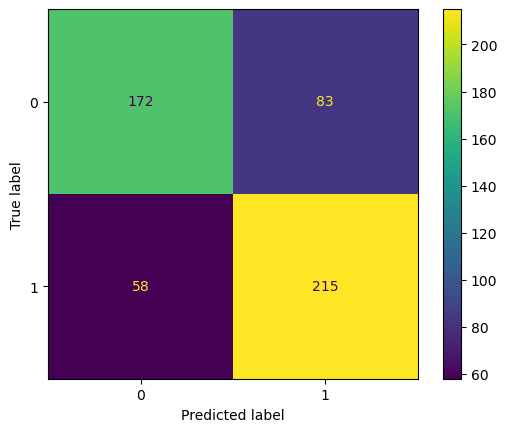

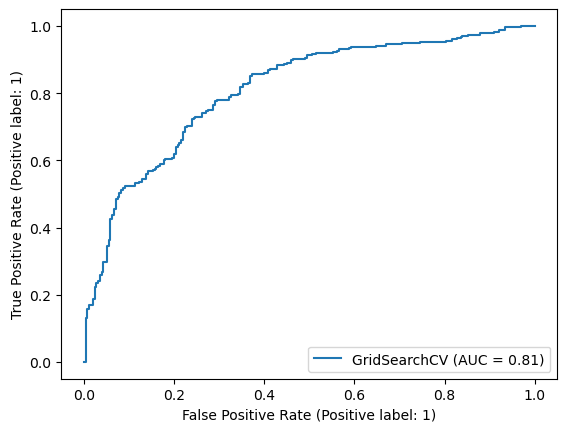

In [14]:
model1 = LogisticRegression(solver = 'saga' , max_iter = 10000)
param_grid1 = {'penalty':['l1' , 'l2']}
mach_model(model1,param_grid1)

## K Nearest Neighbors

In [15]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [16]:
operations = [('scaler' , scaler) , ('knn' , knn)]

In [17]:
pipe = Pipeline(operations)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV] END .................................knn__n_neighbors=1; total time=   0.0s
[CV] END .................................knn__n_neighbors=1; total time=   0.0s
[CV] END .................................knn__n_neighbors=1; total time=   0.0s
[CV] END .................................knn__n_neighbors=1; total time=   0.0s
[CV] END .................................knn__n_neighbors=1; total time=   0.0s
[CV] END .................................knn__n_neighbors=2; total time=   0.0s
[CV] END .................................knn__n_neighbors=2; total time=   0.0s
[CV] END .................................knn__n_neighbors=2; total time=   0.0s
[CV] END .................................knn__n_neighbors=2; total time=   0.0s
[CV] END .................................knn__n_neighbors=2; total time=   0.0s
[CV] END .................................knn__n_neighbors=3; total time=   0.0s
[CV] END .................................knn__

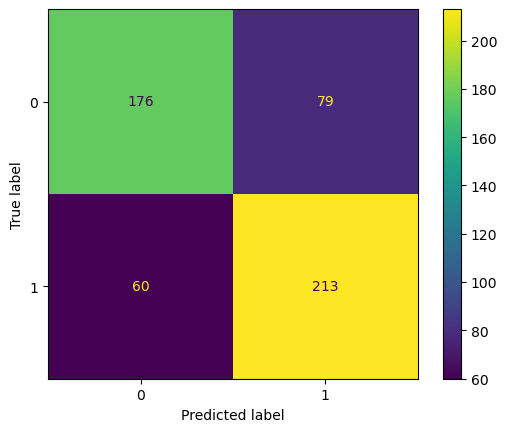

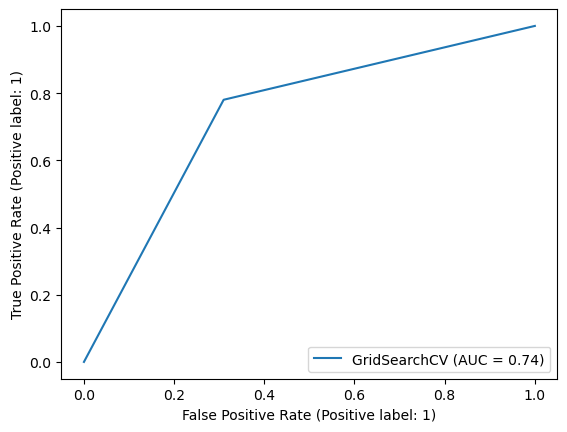

In [18]:
n_neighbors = np.arange(1,40,1)
param_grid2 = {'knn__n_neighbors' : n_neighbors}
grid_model = GridSearchCV(pipe , param_grid2 , verbose = 2 , error_score = 'raise')
grid_model.fit(X_train,y_train)
y_pred = grid_model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
RocCurveDisplay.from_estimator(grid_model , X_test,y_test)

## Support Vector Classifier

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....................C=0.5, degree=1, kernel=linear; total time=   0.1s
[CV] END .....................C=0.5, degree=1, kernel=linear; total time=   0.1s
[CV] END .....................C=0.5, degree=1, kernel=linear; total time=   0.0s
[CV] END .....................C=0.5, degree=1, kernel=linear; total time=   0.1s
[CV] END .....................C=0.5, degree=1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.5, degree=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.5, degree=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.5, degree=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.5, degree=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.5, degree=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.5, degree=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.5, degree=

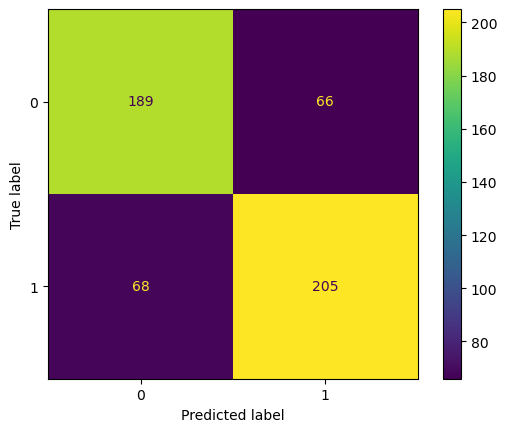

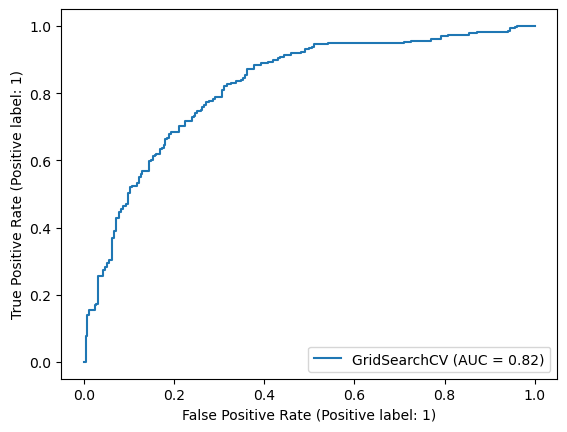

In [19]:
model3 = SVC()
param_grid3 = {'C' : [0.5,0.6,0.9,1] , 'kernel' : ['linear', 'poly', 'rbf'] , 'degree' :[1,2,3]}
mach_model(model3 , param_grid3)

## Decision Tree 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................max_depth=2, max_features=4; total time=   0.0s
[CV] END ........................max_depth=2, max_features=4; total time=   0.0s
[CV] END ........................max_depth=2, max_features=4; total time=   0.0s
[CV] END ........................max_depth=2, max_features=4; total time=   0.0s
[CV] END ........................max_depth=2, max_features=4; total time=   0.0s
[CV] END ........................max_depth=2, max_features=5; total time=   0.0s
[CV] END ........................max_depth=2, max_features=5; total time=   0.0s
[CV] END ........................max_depth=2, max_features=5; total time=   0.0s
[CV] END ........................max_depth=2, max_features=5; total time=   0.0s
[CV] END ........................max_depth=2, max_features=5; total time=   0.0s
[CV] END ........................max_depth=2, max_features=6; total time=   0.0s
[CV] END ........................max_depth=2, ma

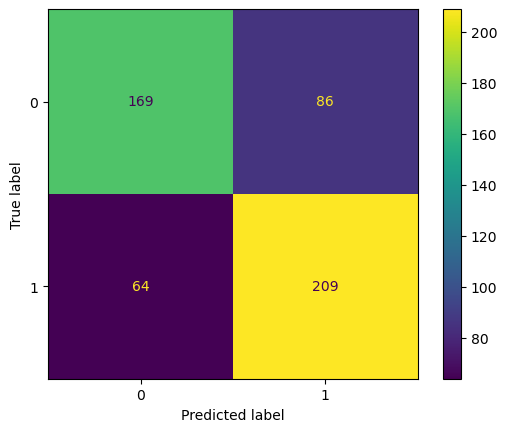

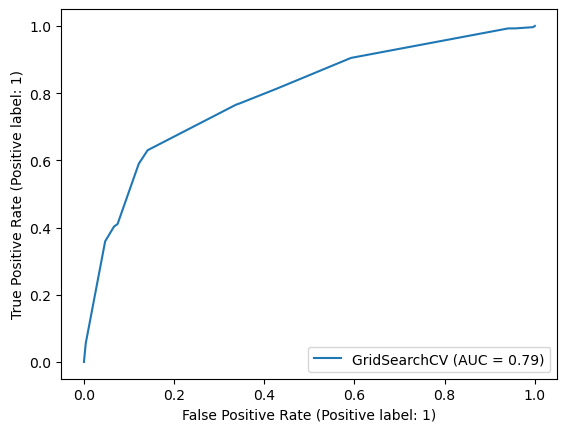

In [22]:
model4 = DecisionTreeClassifier()
param_grid4 = {'max_depth':[2,3,4] , 'max_features' : [4,5,6,7]}
mach_model(model4 , param_grid4)

## Random Forest

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=300; total time=   0.3s
[CV] END ......................max_depth=2, n_es

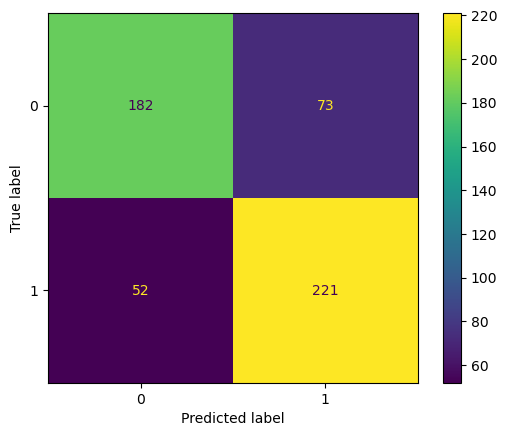

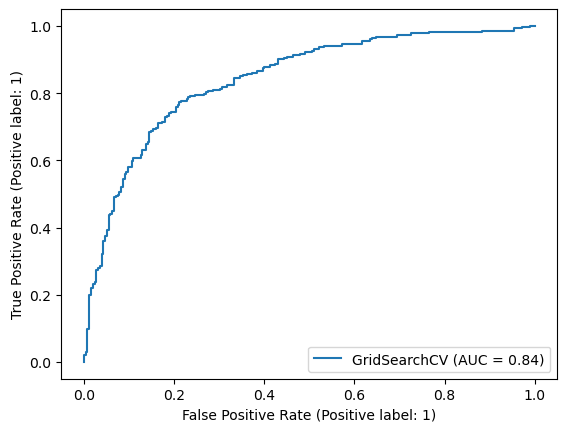

In [23]:
model5 = RandomForestClassifier()
param_grid5 = {'n_estimators':[100,200,300,400] , 'max_depth' : [2,3,4]}
mach_model(model5 , param_grid5)

## Adaptive Boosting Classifier

Fitting 5 folds for each of 156 candidates, totalling 780 fits
[CV] END ..................learning_rate=0.1, n_estimators=1; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=1; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=1; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=1; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=1; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=2; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=2; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=2; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=2; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=2; total time=   0.0s
[CV] END ..................learning_rate=0.1, n_estimators=3; total time=   0.0s
[CV] END ..................learning_rate=0.1, 

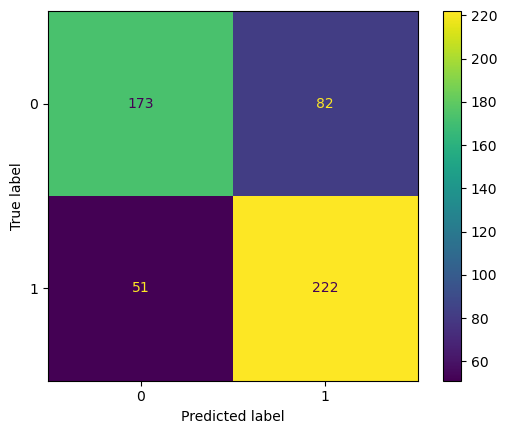

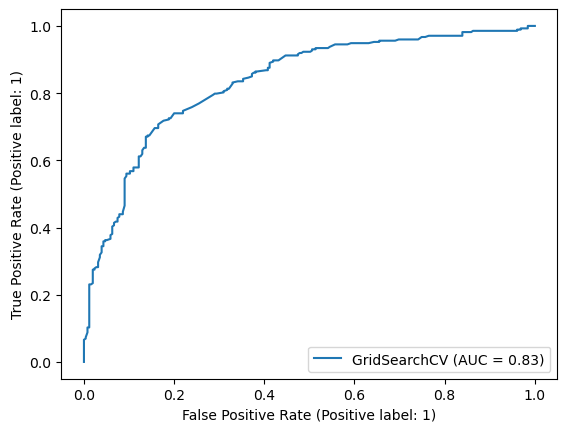

In [26]:
model6 = AdaBoostClassifier()
n_estimators = np.arange(1,40,1)
param_grid6 = {'n_estimators' : n_estimators , 'learning_rate' : [0.1,0.2,0.3,0.4]}
mach_model(model6,param_grid6)

## Gradient Boosting Classifier

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_e

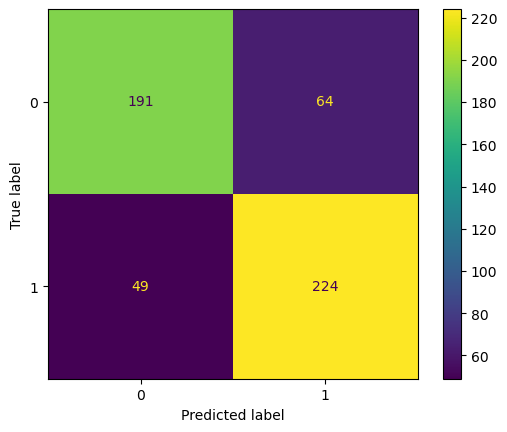

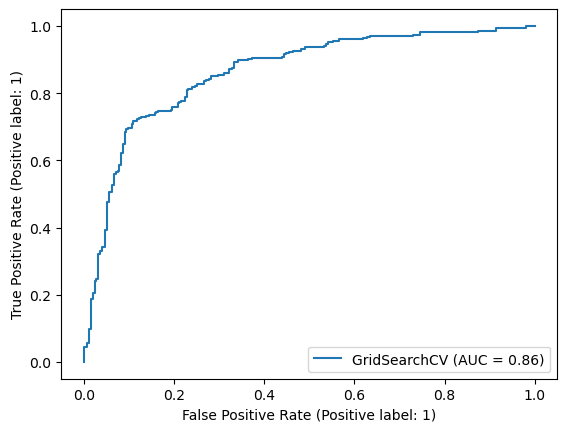

In [27]:
model7 = GradientBoostingClassifier()
param_grid7 = {'n_estimators' : [100,200,300,400,500] , 'max_depth' : [2,3] , 'learning_rate' : [0.1,0.2,0.3]}
mach_model(model7 , param_grid7)